/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4623/463752699.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4623/463752699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4623/463752699.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

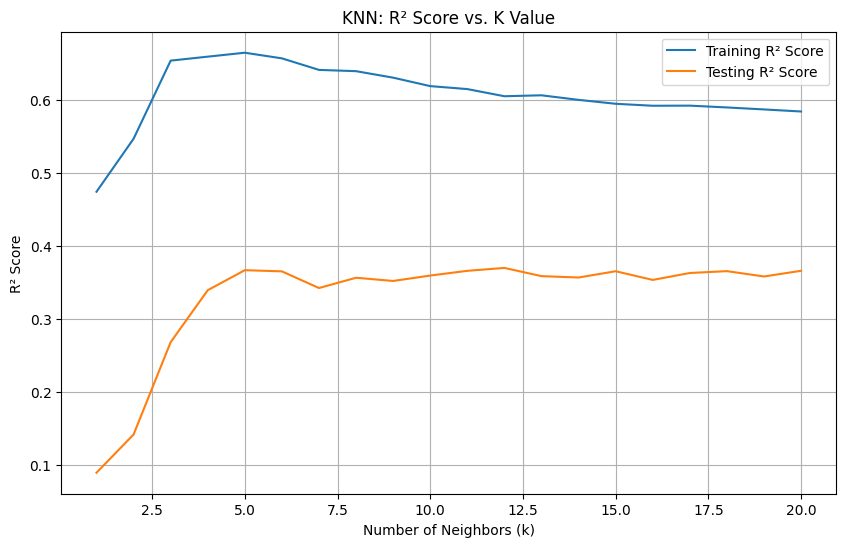

Best k value: 12
Best test R² score: 0.3704
Mean squared error: 1226932458.32


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('laptopPrice.csv')

# Select features
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]
y = df['Price']

# Clean data by removing 'GB' and converting to float
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different k values
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training R² Score')
plt.plot(k_values, test_scores, label='Testing R² Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.title('KNN: R² Score vs. K Value')
plt.legend()
plt.grid(True)
plt.show()

# Find best k value
best_k = k_values[np.argmax(test_scores)]
print(f"Best k value: {best_k}")
print(f"Best test R² score: {max(test_scores):.4f}")

# Train final model with best k
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_model.predict(X_test_scaled)

# Calculate and print MSE
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean squared error: {mse:.2f}")
